# Thông tin sinh viên

Bài tập 7

Sinh viên: Nguyễn Phương Tùng

MSSV: 21520524

# Import thư viện

In [ ]:
from google.colab import drive
import os
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from skimage import feature
from bidict import bidict
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Đường dẫn đến thư mục chứa dữ liệu trong Google Drive
data_path = '/content/drive/My Drive/CS231.O22.1/Baitap/Baitap7/images'


#Yêu cầu 1

In [ ]:
import cv2
import matplotlib.pyplot as plt

def ORB_keypoints2(filepath1, filepath2):
    def process_image(filepath):
        image = cv2.imread(filepath)

        if image is None:
            print(f"Cannot load image from path: {filepath}")
            return None, None

        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        orb = cv2.ORB_create()
        keypoints = orb.detect(gray_image, None)
        keypoints, descriptors = orb.compute(gray_image, keypoints)
        image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=0)
        image_with_keypoints_rgb = cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB)

        return image_with_keypoints_rgb, keypoints

    image_with_keypoints1, keypoints1 = process_image(filepath1)
    image_with_keypoints2, keypoints2 = process_image(filepath2)
    if image_with_keypoints1 is not None:
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(image_with_keypoints1)
        plt.title('ORB Keypoints - Image 1')
        plt.axis('off')

    if image_with_keypoints2 is not None:
        plt.subplot(1, 2, 2)
        plt.imshow(image_with_keypoints2)
        plt.title('ORB Keypoints - Image 2')
        plt.axis('off')

    plt.show()


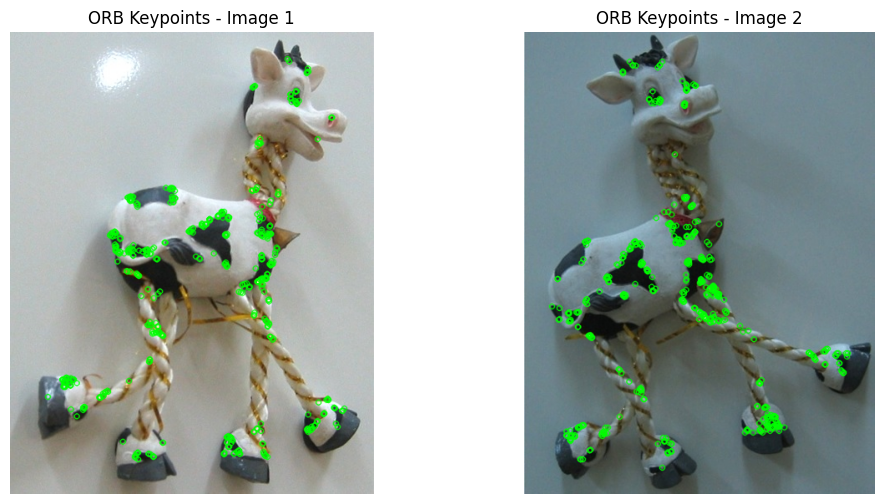

In [ ]:
ORB_keypoints2('/content/drive/My Drive/CS231.O22.1/Baitap/Baitap7/images/cow1.jpg',
              '/content/drive/My Drive/CS231.O22.1/Baitap/Baitap7/images/cow2.jpg')

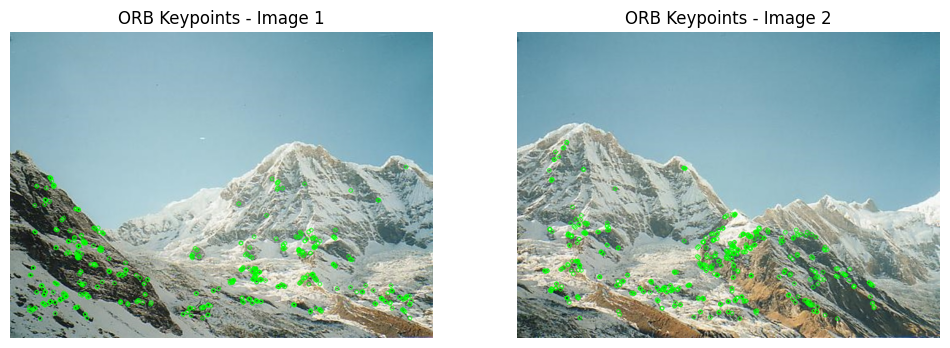

In [ ]:
ORB_keypoints2('/content/drive/My Drive/CS231.O22.1/Baitap/Baitap7/images/match1.jpg',
              '/content/drive/My Drive/CS231.O22.1/Baitap/Baitap7/images/match2.jpg')

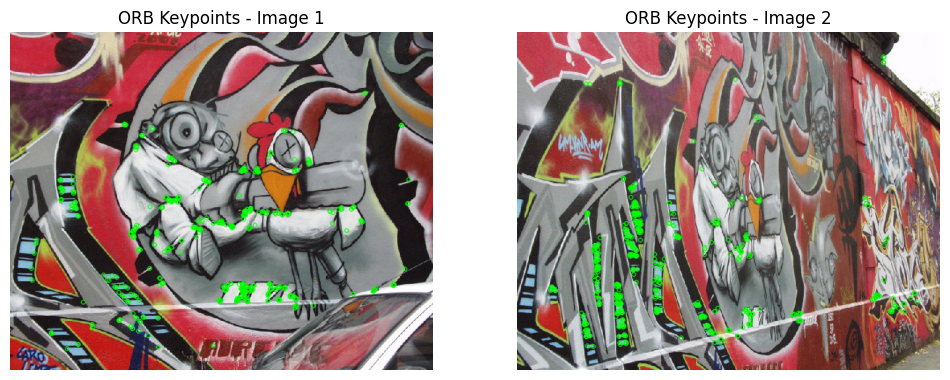

In [ ]:
ORB_keypoints2('/content/drive/My Drive/CS231.O22.1/Baitap/Baitap7/images/graf_img1.jpg',
              '/content/drive/My Drive/CS231.O22.1/Baitap/Baitap7/images/graf_img5.jpg')

#Yêu cầu 2

## Orb

In [ ]:
import cv2
import matplotlib.pyplot as plt

def ORB_keypoints(filepath):
    image = cv2.imread(filepath)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    orb = cv2.ORB_create()
    keypoints = orb.detect(gray_image, None)
    keypoints, descriptors = orb.compute(gray_image, keypoints)
    image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=0)
    image_with_keypoints_rgb = cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image_with_keypoints_rgb)
    plt.title('ORB Keypoints')
    plt.axis('off')

    if descriptors is not None:
        plt.subplot(1, 2, 2)
        plt.imshow(descriptors, aspect='auto', cmap='gray')
        plt.title('Descriptors')
        plt.axis('off')

    plt.show()
    if descriptors is not None:
        print("Descriptors:")
        print(descriptors[:6])

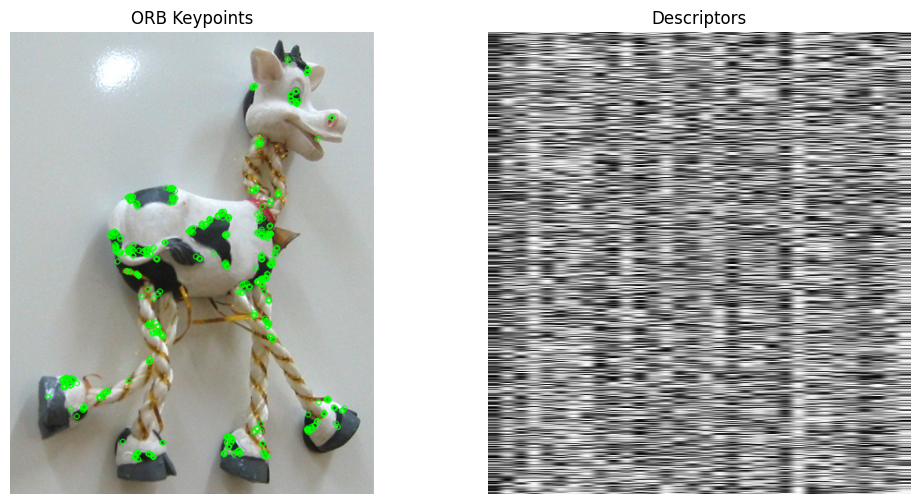

Descriptors:
[[134  90 155 185 254 165 185 206  30  25 208 246 188 214 105  72 255  57
   59 209   3 151  11 243  92   7 191 206 157  25  33 177]
 [147 222  38 189  44 150 236  52 220  90 210  87 245  72  48 225 204  33
   63 111 237 165  87 189 160 123 234 144  28  28 121  13]
 [ 53  55  98  76 118  50 234  80 101 200 251 230 115 232 183 164 126 172
   22 237 141 179   4 142  50  44 163 128 111 234 122 133]
 [ 90 143 150 190 187 248  16  39 191   5 138  57 239 226  32 210 163 183
  236   1  30 201 131 161 154 247  92  91 162  68 173  14]
 [ 30  48 242 161 131 127 184  75  47 117  63 151  79  47  94 140 191  23
  253 181 150 177  57 192 159 221  27 199 231  71 175  87]
 [  8  89  59 252  83 196  59  70 190  13 110 160 189 151  33 112 230  59
  139 192   2 155  34 253 247 229 186 137  18  16  37 235]]


In [ ]:

# Gọi hàm với một đường dẫn tới ảnh
ORB_keypoints('/content/drive/My Drive/CS231.O22.1/Baitap/Baitap7/images/cow1.jpg')


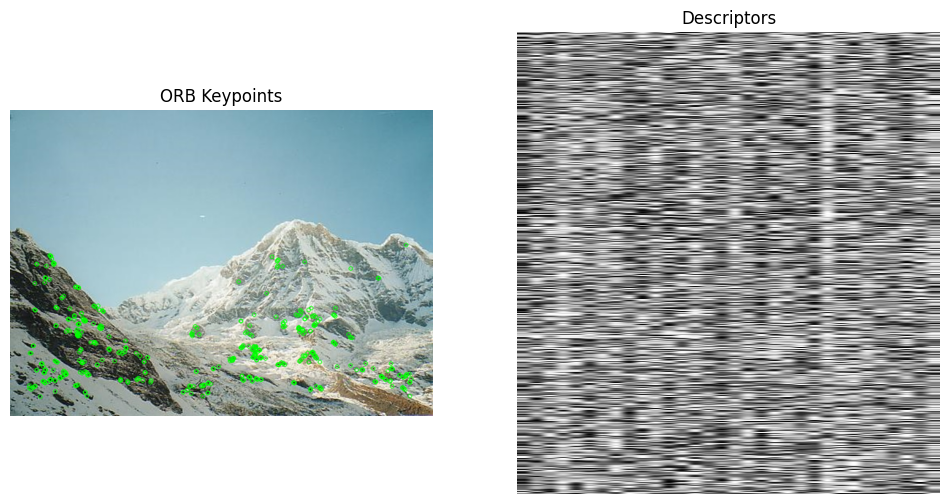

Descriptors:
[[152 179  81  73 242 219 146 221  95 237 120 253  14  28 198 132 182 155
  134  80 183 184 101  92  62 213  36 243 255 140 143  95]
 [ 10  75  42 174 116 131 191 117 206 204  92  43 189 217 178   0 174  43
   23 205 192 185  36 253 224  93 171 176  87 158  21 233]
 [110  20 210 216 223 246 145  83  83 111 116  62   8 183  39 221 125 191
  134 176  48 126  80 222  63 118 209  47 211 236 172 215]
 [221 191 236 109 186  26 159 190  98 229 142 183 145  46 210  98 103  87
  125 245 252  13 245  63 254 237 175 213  45 165 141  87]
 [240 222 235 103 182  66  87 189  49 238 246 247  99 109 139  80 125 214
   37 234 235 212  61  47 122 239 165 133 103 242 244  91]
 [  6 250 174 214 164  91 158 212 159 251  20 253 130 172 254  47 141  88
  151  71 221 253  46 160 234  90 253 181 142 253 156 213]]


In [ ]:
ORB_keypoints('/content/drive/My Drive/CS231.O22.1/Baitap/Baitap7/images/match1.jpg')

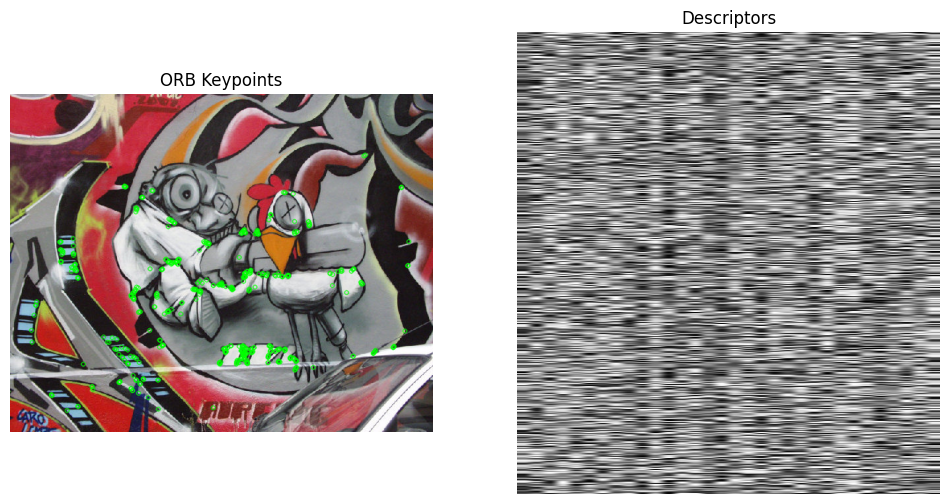

Descriptors:
[[133  58 145 241 228 173 168  22  30 187  80  80 148 147 193  40 223  59
   50  25  35 212  75  82  76 134  63 228 152  73   1 169]
 [ 93   9 251 247 134 250 107  16 232 134 251  66 219 234 209 234 114 244
   60 250 137 240 172 234 133 239 227 128 165 243 101  32]
 [149 132 139 169 148 162 235  85  22   3  91  82  81 195 184  72 121 142
    2 184  59 148  13  30 220 166 186  68 189 202 241 160]
 [ 33 189  56  15  92 157 198 254  86  73 120  79 242 248  55   0 216 106
   18  79 207 170  94  63 108  29   5  88  93  31  88 204]
 [169  86 253 229 100  43 105  20 116 234 118 108 215  51 153  57  62 156
    6  40 169 180 101  10 198 171 112 148 108 218  70 185]
 [ 13  16 253  67  54  43 233  24 124  17 119  86 209  17 157 108 123   4
   62 184 179 180 125  64  76 142  50  68 239 139  80 176]]


In [ ]:
ORB_keypoints('/content/drive/My Drive/CS231.O22.1/Baitap/Baitap7/images/graf_img1.jpg')

## Brief


In [ ]:
import cv2
import matplotlib.pyplot as plt

def BRIEF_keypoints(filepath):
    image = cv2.imread(filepath)

    if image is None:
        print(f"Cannot load image from path: {filepath}")
        return
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    fast = cv2.FastFeatureDetector_create()
    keypoints = fast.detect(gray_image, None)
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
    keypoints, descriptors = brief.compute(gray_image, keypoints)
    image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=0)
    image_with_keypoints_rgb = cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image_with_keypoints_rgb)
    plt.title('BRIEF Keypoints')
    plt.axis('off')
    if descriptors is not None:
        plt.subplot(1, 2, 2)
        plt.imshow(descriptors, aspect='auto', cmap='gray')
        plt.title('Descriptors')
        plt.axis('off')

    plt.show()
    if descriptors is not None:
        print("Descriptors:")
        print(descriptors[:6])



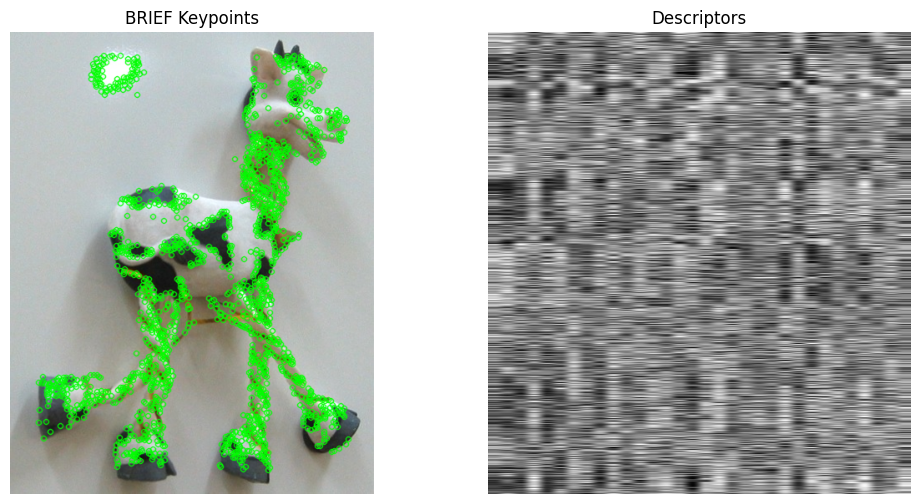

Descriptors:
[[230 248 215  51 211 212  94  34 201 165  39 215 165 114 237 118  89   7
  133 126  38 103   0 223   6  35  26  28   1 168 115 144]
 [230 248 211  18 211 212 122  34 205  45 101 215 133 114 253 247  25   7
  133 126  38 103  52 215  38  35  26 132   1 162  55 144]
 [230 248 147   0 210 204  58 102 207  12 229 247   5  82 252 247  25   7
  173 106  39 103  54 215  34  35  90 132   1 163  63   0]
 [177  96 103 137  20 226  76  27 150 234 149 178  30  64 223 156 230 107
   20 175  65 128 193 152 214 221 229 106 228 248 200 111]
 [230 248 215  19 211 212 122  34 201 173  37 215 133 114 253 247  25   7
  133 126  38 103  36 223   6  35  26   4   3 162  51 144]
 [150 117 123 205   9 200 145 152 162   3  88 104  84  71 180  11 172  76
   34 161 192 152 119   0 113 222  39 211 250 215   1  56]]


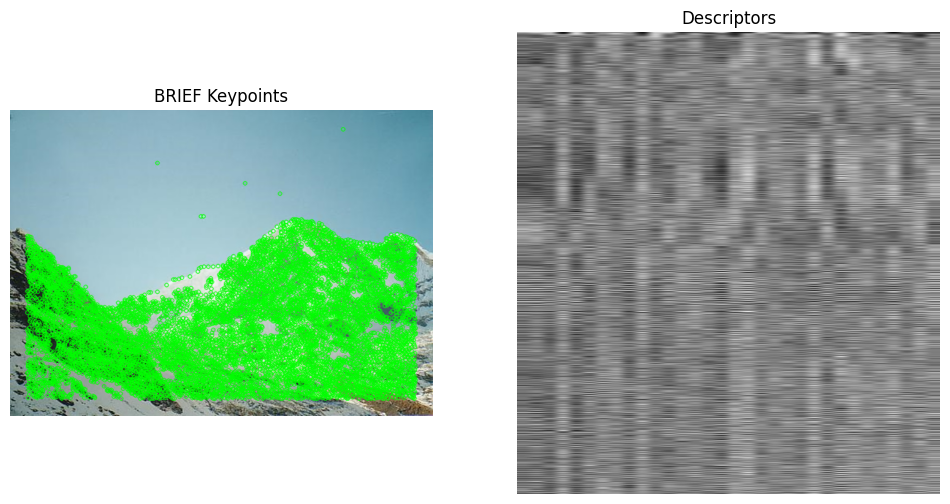

Descriptors:
[[230 249 241   0 208 205  49 178 238  12 228 111  13  19 254 247  25   7
  171  97 139 243  55 215 114 102  90 132  19 195  63  40]
 [230 249 247   2 211 196 107  50 220  45 101 255 132  83 126 255  89   7
  177 123 151  87  22 215  50  99  90 133   1 171  50  20]
 [180 249 251  64 208 200  35 178 230  45 228 255  12  83 254 247  41  69
  171 107 195 210  55 215  50 110  83 132  17 199  29  40]
 [230 251 243   0 208 205  35 182 238  44 229 239  13  19 254 247  25   7
  171 107 131 115  55 215  50  98  90 132  19 195  31  40]
 [ 78 200 241   0 210 140  50  98  79   5 231  55 173 178 234  98  17   7
  229  88  47 103  38  87  58  35  90 132   1  11  59 152]
 [ 78 200 209   4 210 133  58  98 239   5 229  95 133 250 176  99  17   7
  229  72 175 119  38  87 226  51  90 132   1   3  55 144]]


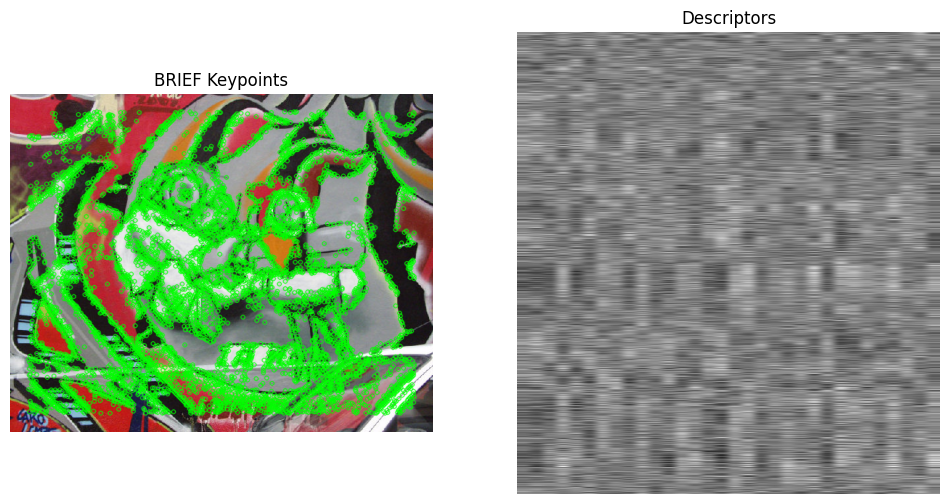

Descriptors:
[[203 202   4 186  54  55 214 103  25 210  31 135  99 168 129 188  82  50
  220  76 116 111 136 125 204  51 140 185   5  56 174 215]
 [167 184 223  43 223 198  94  34 153 233 213 211 191 113  79 182 221  71
  132  30 101  96   0 221  22  74 195  12 198 188 242 214]
 [231 184 223  57 211 212  94  98 235 237 213 215 159 112 205 182 221  71
  132  30  37  96   0 220  22  15 219  12 196 184 255 218]
 [230 250 149  26 211  84  86 102  13  12 117 215 135  56 253 247  81   5
  140 126 111  99  16 223  38  35  30 149  69 160 191 208]
 [135 127 187  33 195  69 203 126  98  48 141 239 197  31  54 231 173  68
   45 107   0 160  49 132  50 174 115  21  39 215  93  58]
 [230 250 151 171 195  76 214 103 106 164  63 231 143  28 253 247 217   5
  165 122 103  98  16 199  12 167  90  21  67 129 255  18]]


In [ ]:
BRIEF_keypoints('/content/drive/My Drive/CS231.O22.1/Baitap/Baitap7/images/cow1.jpg')
BRIEF_keypoints('/content/drive/My Drive/CS231.O22.1/Baitap/Baitap7/images/match1.jpg')
BRIEF_keypoints('/content/drive/My Drive/CS231.O22.1/Baitap/Baitap7/images/graf_img1.jpg')

#Yêu cầu 3

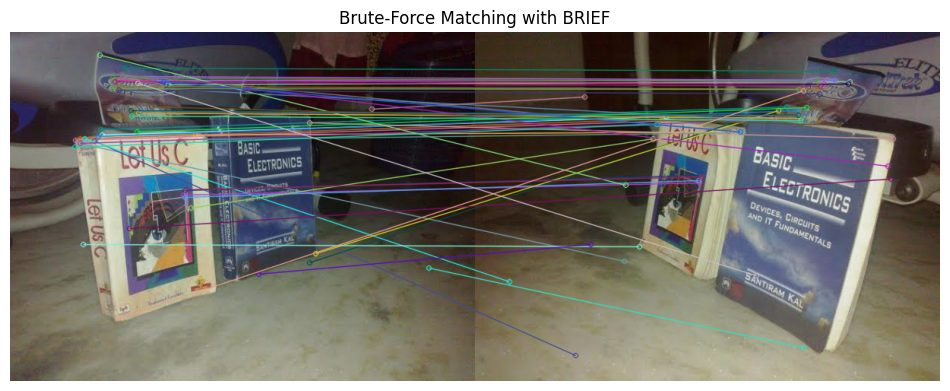

In [ ]:
import cv2
import matplotlib.pyplot as plt

def BRIEF_BF_Matching(filepath1, filepath2):
    def process_image(filepath):
        image = cv2.imread(filepath)
        if image is None:
            return None, None, None
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        fast = cv2.FastFeatureDetector_create()
        keypoints = fast.detect(gray_image, None)
        brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
        keypoints, descriptors = brief.compute(gray_image, keypoints)

        return image, keypoints, descriptors
    image1, keypoints1, descriptors1 = process_image(filepath1)
    image2, keypoints2, descriptors2 = process_image(filepath2)
    if descriptors1 is None or descriptors2 is None:
        print("Cannot compute descriptors for one or both images.")
        return

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)
    matches = sorted(matches, key=lambda x: x.distance)
    image_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    image_matches_rgb = cv2.cvtColor(image_matches, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(12, 6))
    plt.imshow(image_matches_rgb)
    plt.title('Brute-Force Matching with BRIEF')
    plt.axis('off')
    plt.show()
BRIEF_BF_Matching('/content/drive/My Drive/CS231.O22.1/Baitap/Baitap7/images/left.jpg',
                  '/content/drive/My Drive/CS231.O22.1/Baitap/Baitap7/images/right.jpg')




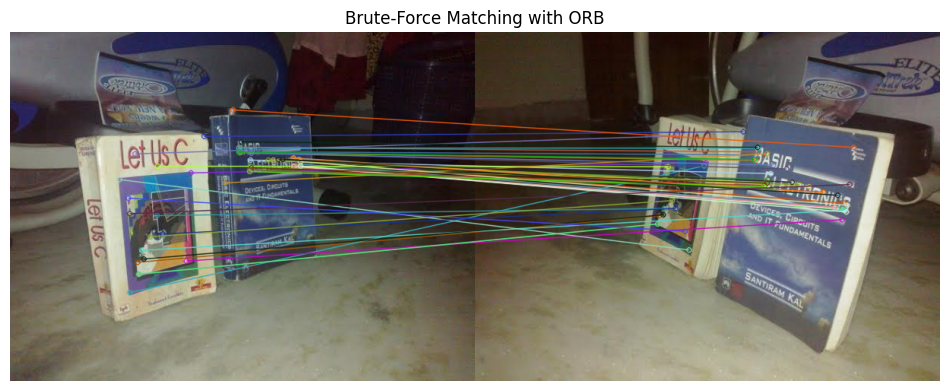

In [ ]:
import cv2
import matplotlib.pyplot as plt

def ORB_BF_Matching(filepath1, filepath2):
    def process_image(filepath):
        image = cv2.imread(filepath)

        if image is None:
            return None, None, None

        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        orb = cv2.ORB_create()
        keypoints, descriptors = orb.detectAndCompute(gray_image, None)

        return image, keypoints, descriptors
    image1, keypoints1, descriptors1 = process_image(filepath1)
    image2, keypoints2, descriptors2 = process_image(filepath2)
    if descriptors1 is None or descriptors2 is None:
        return
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)
    matches = sorted(matches, key=lambda x: x.distance)
    image_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    image_matches_rgb = cv2.cvtColor(image_matches, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(12, 6))
    plt.imshow(image_matches_rgb)
    plt.title('Brute-Force Matching with ORB')
    plt.axis('off')
    plt.show()

ORB_BF_Matching('/content/drive/My Drive/CS231.O22.1/Baitap/Baitap7/images/left.jpg',
                '/content/drive/My Drive/CS231.O22.1/Baitap/Baitap7/images/right.jpg')


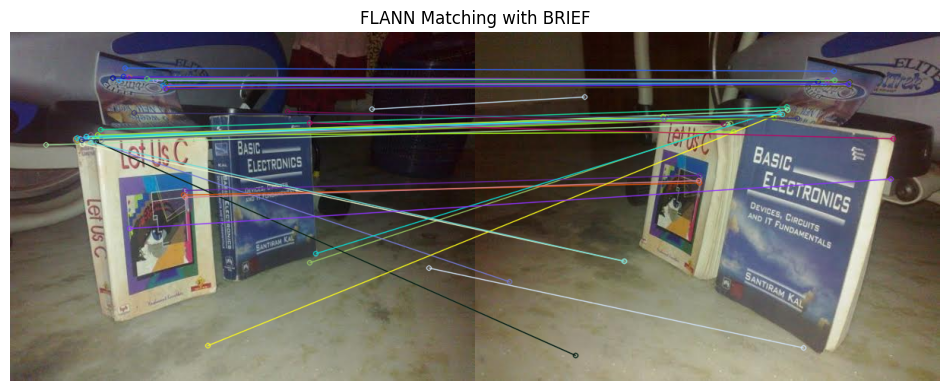

In [ ]:
import cv2
import matplotlib.pyplot as plt

def BRIEF_PLANN_Matching(filepath1, filepath2):
    def process_image(filepath):
        image = cv2.imread(filepath)
        if image is None:
            return None, None, None

        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        fast = cv2.FastFeatureDetector_create()
        keypoints = fast.detect(gray_image, None)
        brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
        keypoints, descriptors = brief.compute(gray_image, keypoints)

        return image, keypoints, descriptors
    image1, keypoints1, descriptors1 = process_image(filepath1)
    image2, keypoints2, descriptors2 = process_image(filepath2)
    if descriptors1 is None or descriptors2 is None:
        print("Cannot compute descriptors for one or both images.")
        return
    index_params = dict(algorithm=6, table_number=6, key_size=12, multi_probe_level=2)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.match(descriptors1, descriptors2)
    matches = sorted(matches, key=lambda x: x.distance)
    image_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    image_matches_rgb = cv2.cvtColor(image_matches, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(12, 6))
    plt.imshow(image_matches_rgb)
    plt.title('FLANN Matching with BRIEF')
    plt.axis('off')
    plt.show()

BRIEF_PLANN_Matching('/content/drive/My Drive/CS231.O22.1/Baitap/Baitap7/images/left.jpg',
                     '/content/drive/My Drive/CS231.O22.1/Baitap/Baitap7/images/right.jpg')


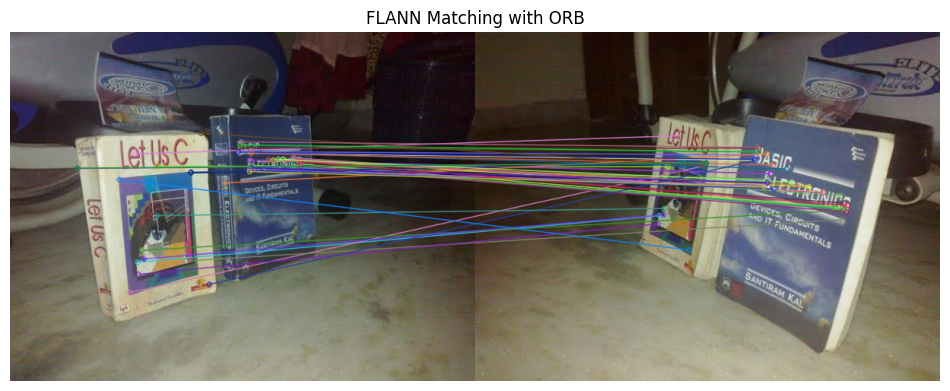

In [ ]:
import cv2
import matplotlib.pyplot as plt

def ORB_PLANN_Matching(filepath1, filepath2):
    def process_image(filepath):
        image = cv2.imread(filepath)
        if image is None:
            return None, None, None
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        orb = cv2.ORB_create()
        keypoints, descriptors = orb.detectAndCompute(gray_image, None)

        return image, keypoints, descriptors
    image1, keypoints1, descriptors1 = process_image(filepath1)
    image2, keypoints2, descriptors2 = process_image(filepath2)
    if descriptors1 is None or descriptors2 is None:
        return
    index_params = dict(algorithm=6, table_number=6, key_size=12, multi_probe_level=2)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.match(descriptors1, descriptors2)
    matches = sorted(matches, key=lambda x: x.distance)
    image_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    image_matches_rgb = cv2.cvtColor(image_matches, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(12, 6))
    plt.imshow(image_matches_rgb)
    plt.title('FLANN Matching with ORB')
    plt.axis('off')
    plt.show()

ORB_PLANN_Matching('/content/drive/My Drive/CS231.O22.1/Baitap/Baitap7/images/left.jpg',
                   '/content/drive/My Drive/CS231.O22.1/Baitap/Baitap7/images/right.jpg')
